In [92]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Parte 1.1: Cargue los datos en un DataFrame de Pandas
file_path = 'UK_foods.csv'
data = pd.read_csv(file_path)

# Visualiza las primeras filas del DataFrame para verificar la carga correcta de los datos
print(data.head())

       Unnamed: 0  England  Wales  Scotland  N.Ireland
0          Cheese      105    103       103         66
1   Carcass_meat       245    227       242        267
2     Other_meat       685    803       750        586
3            Fish      147    160       122         93
4  Fats_and_oils       193    235       184        209


In [93]:
# Parte 1.2: Realice una exploración básica de los datos (estadísticas descriptivas)
print(data.describe())

           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000


In [94]:
# Parte 1.3: Normalice los datos, si es necesario
normalizador = MinMaxScaler()
normalized_data = normalizador.fit_transform(data.iloc[:, 1:])

# Verifica que los datos estén normalizados
print(normalized_data)

[[0.03596615 0.0256917  0.03291639 0.01706485]
 [0.13469676 0.10737813 0.12442396 0.15426621]
 [0.44499295 0.48682477 0.45885451 0.37201365]
 [0.06558533 0.06324111 0.04542462 0.03549488]
 [0.09802539 0.11264822 0.08624095 0.11467577]
 [0.0719323  0.07312253 0.06188282 0.0668942 ]
 [0.4696756  0.53359684 0.33772219 0.67713311]
 [0.1403385  0.13241107 0.07768269 0.06962457]
 [0.30606488 0.33333333 0.24028966 0.21433447]
 [0.10155148 0.09156785 0.10994075 0.0996587 ]
 [0.2157969  0.19828722 0.18696511 0.2       ]
 [0.73906911 0.70685112 0.59512837 0.43208191]
 [1.         1.         0.92758394 0.99180887]
 [0.00211566 0.00592885 0.         0.00409556]
 [0.93088858 0.78524374 1.         1.        ]
 [0.22637518 0.27075099 0.26662278 0.06416382]
 [0.         0.         0.00592495 0.        ]]


## Parte 2 

In [95]:

# Construir el autocodificador
codificador = Sequential()
codificador.add(Dense(units=2, activation='relu', input_shape=[len(data.columns) - 1]))
decodificador = Sequential()
decodificador.add(Dense(units=len(data.columns) - 1, activation='relu', input_shape=[2]))
autocodificador = Sequential([codificador, decodificador])

# Compilar el autocodificador
autocodificador.compile(loss='mse', optimizer=SGD(lr=1.5))

# Entrenar el autocodificador
autocodificador.fit(normalized_data, normalized_data, epochs=100)

Epoch 1/100


1/1 [==============================] - 0s 257ms/step - loss: 0.1692
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1688
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1684
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1681
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 0.1677
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1673
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1669
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1666
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1662
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1658
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1655
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1651
Epoch 13/100
1/1 [==============================] - 0s 4ms/step - loss:

## Parte 3

1/1 [==============================] - 0s 57ms/step


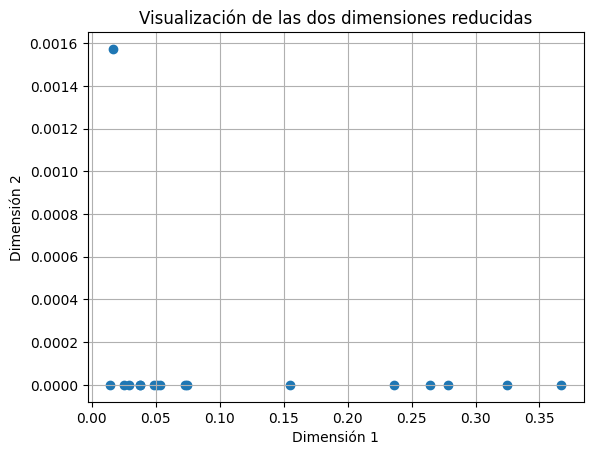

In [96]:
# Obtener las dos dimensiones reducidas
codificado_2dim = codificador.predict(normalized_data)

# Visualizar las dos dimensiones reducidas
plt.scatter(codificado_2dim[:, 0], codificado_2dim[:, 1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de las dos dimensiones reducidas')
plt.grid(True)
plt.show()

# También puedes usar Plotly Express para una visualización interactiva
fig = px.scatter(x=codificado_2dim[:, 0], y=codificado_2dim[:, 1], width=700, height=500)
fig.show()

In [97]:
# Parte 2.4: Evaluar el rendimiento del autocodificador utilizando medidas como la pérdida de reconstrucción
loss = autocodificador.evaluate(normalized_data, normalized_data)
print(f'Pérdida de reconstrucción: {loss:.4f}')


1/1 [==============================] - 0s 114ms/step - loss: 0.1442
Pérdida de reconstrucción: 0.1442


## Parte 4

4.1 ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?

Para obtener percepciones sobre los patrones de consumo de alimentos, puedes examinar el gráfico de dispersión de las dos dimensiones reducidas y buscar tendencias o agrupaciones. Algunas preguntas que puedes responder incluyen:

¿Hay grupos de países que tienden a consumir alimentos similares?
¿Hay países que se destacan por un consumo particularmente alto o bajo de ciertos alimentos?
¿Puedes identificar patrones que sugieran preferencias alimentarias regionales?
Además, puedes comparar las posiciones relativas de los puntos en el gráfico de dispersión con los datos originales para obtener más información.

4.2 ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?

Para evaluar si el autocodificador hizo un buen trabajo al reducir la dimensionalidad, puedes considerar varias métricas:

Pérdida de reconstrucción: Ya calculaste la pérdida de reconstrucción en la Parte 2. Cuanto menor sea esta pérdida, mejor será la capacidad del autocodificador para conservar la información esencial durante la reducción de dimensionalidad.

Visualización: Observa el gráfico de dispersión de las dos dimensiones reducidas. Si los puntos se agrupan de manera significativa o si puedes identificar patrones claros en la visualización, es una indicación de que el autocodificador ha capturado información relevante.

Interpretabilidad: Intenta interpretar las dimensiones reducidas y determina si tienen sentido en el contexto de tus datos y tus objetivos. Si puedes asignar un significado o interpretación a estas dimensiones, es una señal positiva.

En tu reporte, puedes discutir estas métricas y proporcionar una evaluación general del rendimiento del autocodificador en función de tus objetivos específicos.

Con esto, has completado la Parte 4 del laboratorio. Asegúrate de documentar tus observaciones y conclusiones en tu reporte en formato PDF, como se especifica en los entregables. ¡Buena suerte con tu laboratorio!

Epoch 1/100
1/1 [==============================] - 0s 327ms/step - loss: 0.1026
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1016
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1006
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0996
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0986
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0977
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0967
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0958
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0949
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0940
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0931
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0922
Epoch 13/100
1/1 [==============================] - 0s 7ms/

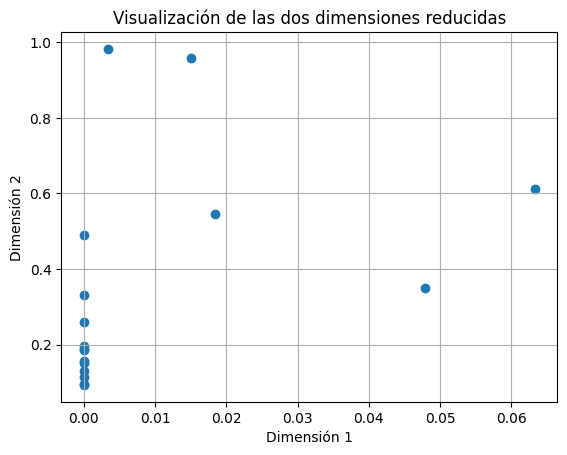

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Parte 1: Preparación de Datos

# Cargar los datos
file_path = 'UK_foods.csv'
data = pd.read_csv(file_path)

# Normalizar los datos
normalizador = MinMaxScaler()
normalized_data = normalizador.fit_transform(data.iloc[:, 1:])

# Parte 2: Construcción del Autocodificador

# Construir el autocodificador
codificador = Sequential()
codificador.add(Dense(units=2, activation='relu', input_shape=[len(data.columns) - 1]))
decodificador = Sequential()
decodificador.add(Dense(units=len(data.columns) - 1, activation='relu', input_shape=[2]))
autocodificador = Sequential([codificador, decodificador])

# Compilar el autocodificador
autocodificador.compile(loss='mse', optimizer=SGD(lr=1.5))

# Entrenar el autocodificador
autocodificador.fit(normalized_data, normalized_data, epochs=100)

# Obtener las dos dimensiones reducidas
codificado_2dim = codificador.predict(normalized_data)

# Parte 3: Reducción de Dimensionalidad y Visualización

# Visualizar las dos dimensiones reducidas
plt.scatter(codificado_2dim[:, 0], codificado_2dim[:, 1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de las dos dimensiones reducidas')
plt.grid(True)
plt.show()

# También puedes usar Plotly Express para una visualización interactiva
fig = px.scatter(x=codificado_2dim[:, 0], y=codificado_2dim[:, 1], width=700, height=500)
fig.show()

# Parte 4: Discusión y percepciones nuevas "Insights"

# 4.1 ¿Qué podemos aprender sobre los patrones de consumo de alimentos en los cuatro países del Reino Unido?
# 4.2 ¿El autocodificador hizo un buen trabajo al reducir la dimensionalidad? ¿Qué métricas de rendimiento apoyan su afirmación?
# Puedes proporcionar tus observaciones y conclusiones aquí.
